# 0. 기본 설정

In [1]:
import numpy as np ##배열, 3장에서는 DataFrame은 다루지 않음
import os  ##사실 3장에서는 필요 없음
import matplotlib ##그림용
import matplotlib.pyplot as plt ##그림용
import sklearn ##사이킷런
import pandas as pd

np.random.seed(42) ##랜덤시드 

matplotlib.rc('font', family='NanumBarunGothic') ##matplotlib 한글을 위해
plt.rcParams['axes.unicode_minus'] = False ##한글을 위해

# 1. 데이터 불러오기

캐글에서 원하는 데이터를 다운받고, 원하는 폴더에 넣기

In [2]:
TITANIC_PATH = 'datasets/titanic'

def load_titanic_data_train(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, "train.csv")
    return pd.read_csv(csv_path)

def load_titanic_data_submission(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, "test.csv")
    return pd.read_csv(csv_path)

In [3]:
titanic = load_titanic_data_train()
titanic_submission = load_titanic_data_submission()

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 타깃 값은 어떤건지 알아보기

In [5]:
for column in titanic.columns:
    if column not in titanic_submission.columns:
        print(column, " is not in test data ")
    else:
        print(column)

PassengerId
Survived  is not in test data 
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


# 2. 자료 둘러보기

## 1. 자료 둘러보기

In [6]:
titanic.info()  ##1. 누락값 체크 2. 저장된 자료형 체크

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- object 값이 category인지 아닌지 체크

In [7]:
titanic["Name"].value_counts()

Meyer, Mr. Edgar Joseph                                      1
Ibrahim Shawah, Mr. Yousseff                                 1
Hansen, Mr. Claus Peter                                      1
Chronopoulos, Mr. Apostolos                                  1
Dahl, Mr. Karl Edwart                                        1
Morrow, Mr. Thomas Rowan                                     1
Bystrom, Mrs. (Karolina)                                     1
Eklund, Mr. Hans Linus                                       1
Ward, Miss. Anna                                             1
Soholt, Mr. Peter Andreas Lauritz Andersen                   1
Horgan, Mr. John                                             1
Hodges, Mr. Henry Price                                      1
Harris, Mr. Henry Birkhardt                                  1
Brown, Mr. Thomas William Solomon                            1
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)    1
Wiklund, Mr. Jakob Alfred                              

In [8]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
titanic["Ticket"].value_counts()

347082               7
1601                 7
CA. 2343             7
CA 2144              6
3101295              6
347088               6
S.O.C. 14879         5
382652               5
W./C. 6608           4
349909               4
17421                4
19950                4
2666                 4
LINE                 4
4133                 4
113781               4
113760               4
347077               4
PC 17757             4
29106                3
24160                3
F.C.C. 13529         3
PC 17572             3
248727               3
110152               3
SC/Paris 2123        3
230080               3
35273                3
363291               3
C.A. 31921           3
                    ..
PC 17599             1
C.A. 31026           1
26707                1
324669               1
113056               1
113787               1
112053               1
PC 17601             1
392092               1
113784               1
STON/O 2. 3101286    1
372622               1
350035     

In [10]:
titanic["Cabin"].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
D                  3
F33                3
C22 C26            3
F2                 3
E101               3
C93                2
C123               2
C83                2
C124               2
B51 B53 B55        2
F4                 2
C92                2
C65                2
D35                2
E25                2
D20                2
B49                2
D33                2
E44                2
B5                 2
B35                2
B57 B59 B63 B66    2
D17                2
C125               2
E24                2
C2                 2
B77                2
                  ..
E12                1
B94                1
C104               1
C87                1
C118               1
E46                1
C30                1
B101               1
C110               1
B19                1
T                  1
C111               1
B38                1
D56                1
C85                1
A24                1
B80          

In [11]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- 숫자형 자료의 통계치 체크

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 그림을 통한 인사이트 얻기 시도

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245A5253748>,
      dtype=object)

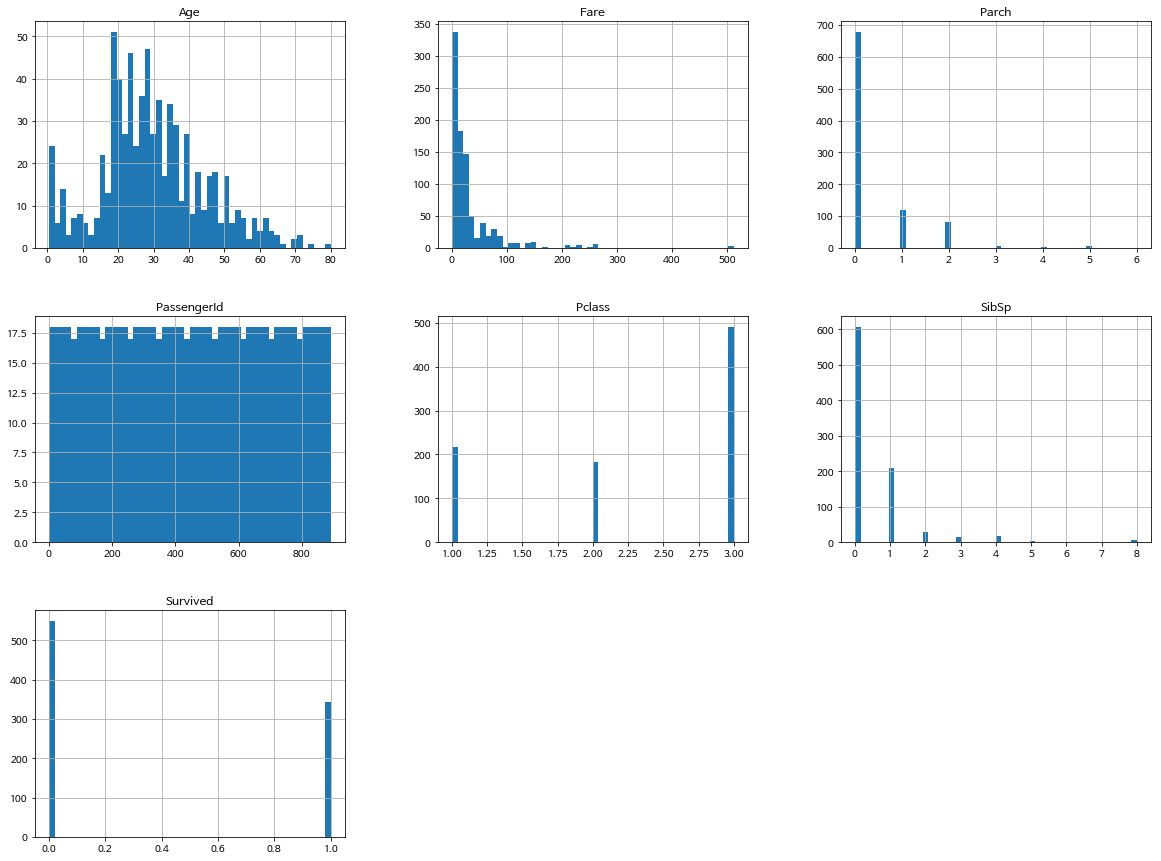

In [13]:
titanic.hist(bins=50, figsize=(20,15))

## 2. train set과 test set으로 나누기

가정1. 나이와 생존의 상관관계가 높을 것 같아서 나이를 기준으로 나눔

하지만 그 중 나이의 누락값이 있으므로  
나이가 있는 데이터 0.2  
나이가 없는 데이터 0.2  
를 test set에 넣음

In [14]:
titanic_age_exist = titanic.iloc[titanic['Age'].dropna().index]
titanic_age_nonexist = titanic[titanic['Age'].apply(np.isnan)]

In [15]:
titanic_age_exist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [16]:
titanic_age_nonexist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 12 columns):
PassengerId    177 non-null int64
Survived       177 non-null int64
Pclass         177 non-null int64
Name           177 non-null object
Sex            177 non-null object
Age            0 non-null float64
SibSp          177 non-null int64
Parch          177 non-null int64
Ticket         177 non-null object
Fare           177 non-null float64
Cabin          19 non-null object
Embarked       177 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


그 중 나이가 있는 데이터를 category화 해서 데이터를 쪼갬

In [17]:
titanic_age_exist["Age_cat"] = np.ceil(titanic_age_exist["Age"] / 8)
titanic_age_exist["Age_cat"].where(titanic_age_exist["Age_cat"] < 7, 7.0, inplace=True)

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


이렇게 쪼개면 인덱스가 원래 상태가 아니기 때문에 인덱스를 다시 정리해줘야함  
인덱스가 원래 상태 가 아니면 StratifiedShuffleSplit이 잘 돌아가지 않음

In [18]:
titanic_age_exist = titanic_age_exist.reset_index()
titanic_age_exist.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5.0


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic_age_exist, titanic_age_exist['Age_cat']):
    strat_train_set = titanic_age_exist.loc[train_index]
    strat_test_set = titanic_age_exist.loc[test_index]

In [20]:
strat_train_set.drop(['Age_cat'], axis=1)
del strat_train_set.index.name

In [21]:
for set in (strat_train_set, strat_test_set):
    set.set_index("index", inplace=True)    
    set.drop(['Age_cat'], axis=1, inplace=True)
    del set.index.name

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(titanic_age_nonexist, test_size=0.2, random_state=42)

In [23]:
final_train_set = strat_train_set.append(train_set)
final_test_set = strat_test_set.append(test_set)

In [24]:
final_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.000,NaN,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.900,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.500,NaN,S


# 3. 데이터 이해를 위한 탐색

In [25]:
titanic = final_train_set

## 1. 상관관계 조사

In [26]:
corr_matrix = titanic.corr()

In [27]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.275139
Parch          0.086822
SibSp         -0.012085
PassengerId   -0.014321
Age           -0.093724
Pclass        -0.346018
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245A957F748>,
      dtype=object)

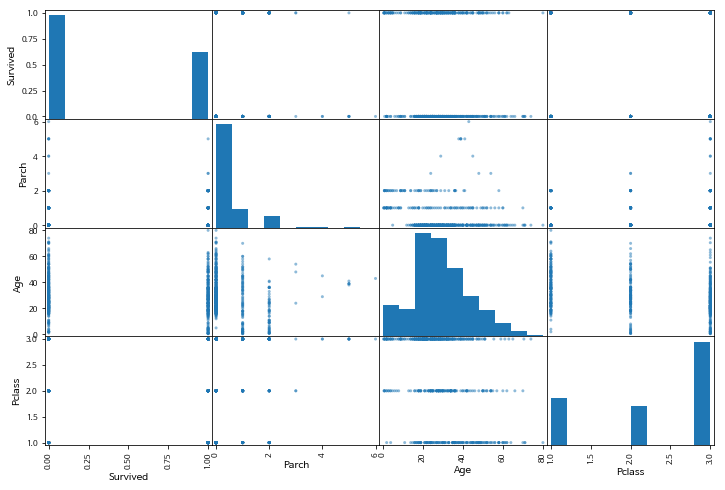

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Parch", "Age", "Pclass"]
scatter_matrix(titanic[attributes], figsize=(12,8))

무엇인가를 알아내기 어려움

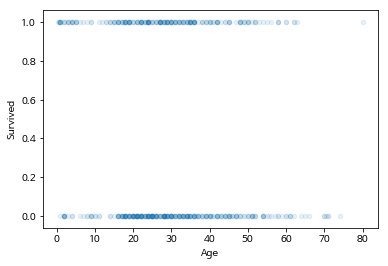

In [29]:
titanic.plot(kind="scatter", x="Age", y="Survived", alpha=0.1)

target value가 regression처럼 연속적인 숫자가 아니여서 상관관계 조사로는 많은 정보를 얻을 수 없음

## 2. 특성 조합

In [30]:
titanic["Age_per_Pclass"] = titanic["Age"]/titanic["Pclass"]
titanic["Fare_per_Pclass"] = titanic["Fare"]/titanic["Pclass"]
titanic["Parch_per_Pclass"] = titanic["Parch"]/titanic["Pclass"]
titanic["SibSp_per_Pclass"] = titanic["SibSp"]/titanic["Pclass"]
titanic["Pclass_per_Fare"] = titanic["Pclass"]/titanic["Fare"]

In [31]:
corr_matrix = titanic.corr()

In [32]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived            1.000000
Fare_per_Pclass     0.281955
Fare                0.275139
Parch_per_Pclass    0.173965
Age_per_Pclass      0.151289
SibSp_per_Pclass    0.110139
Parch               0.086822
SibSp              -0.012085
PassengerId        -0.014321
Age                -0.093724
Pclass_per_Fare    -0.344057
Pclass             -0.346018
Name: Survived, dtype: float64

*인덱스 732인 Knight, Mr. Robert J는 the guarantee group의 멤버로서 티켓값을 안내고 탔었음  
따라서 마지막 titanic["Plcass_per_Far"]은 inf값을 하나 가짐  
후에 오류를 발생시킴으로 Pclass_per_Fare행을 없앰 *

In [33]:
titanic.drop("Pclass_per_Fare", axis=1 , inplace = True)

object 값이 많기 때문에 쉽게 특성조합을 하기 어려움

딱히 좋은 상관관계를 갖는 지표를 찾기가 어려움

이러한 문제에 대해서 시각화가 어떤 식으로 진행되야 되는지 모르겠음

- 사실 위에 있는 수식은 원하는 바를 제대로 구현하지 못했음  
- Pclass는 범주형 자료이기 때문에 특성조합을 하려면 다른 식의 특성조합을 해야함  

In [34]:
titanic.drop(["Age_per_Pclass", "Fare_per_Pclass", "Parch_per_Pclass", "SibSp_per_Pclass"],axis=1 ,inplace=True)

Q. 어떻게 하면 좋을까????

# 3. 데이터 전처리

## 1. 데이터 정제

In [35]:
titanic = final_train_set.drop("Survived", axis=1)

In [36]:
titanic_labels = final_train_set["Survived"].copy()

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 383 to 502
Data columns (total 11 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            571 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          171 non-null object
Embarked       711 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


3가지 선택지가 있음
- 해당 구역 제거
- 전체 특성 삭제
- 어떤 값으로 채움  
 
이 중  
Age는 옵션 3  
Cabin은 옵션 1  
Embared는 옵션 1  
을 쓰도록 함

- Cabin 처리

In [38]:
titanic.drop("Cabin", axis=1, inplace=True)

***

- Age 처리

가정2. 나이와 좌석의 상관관계  
passenger class에 따라 나이의 평균을 구해 nan값에 집어넣음

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
titanic_num_including_Pclass = titanic.drop(["Name","Sex","Ticket",'Embarked'], axis=1)
titanic_num_including_Pclass.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
383,384,1,35.0,1,0,52.000
742,743,1,21.0,2,2,262.375
147,148,3,9.0,2,2,34.375
480,481,3,9.0,5,2,46.900
770,771,3,24.0,0,0,9.500


In [40]:
def num_tr(X):
    X = X.reset_index()  ##나중에 인덱스를 살리기 위해
    num_tr= pd.DataFrame()  ##빈 데이터프레임을 넣기
    for n in range(3):
        num_Pclass = X[X['Pclass'] == n+1] 
        imputer.fit(num_Pclass) ##n+1번째 Pclass에 있는 나이의 중위값을 찾음
        num_Pclass_tr = imputer.transform(num_Pclass) ## 넣음
        num_tr = num_tr.append(pd.DataFrame(num_Pclass_tr, columns = X.columns)) ##빈 데이터 프레임을 늘려감

    num_tr.set_index('index', inplace = True)
    del num_tr.index.name
    num_tr.drop("Pclass", axis=1, inplace =True)
    return num_tr

In [41]:
titanic_tr = num_tr(titanic_num_including_Pclass)

***

- Embarked 처리

In [42]:
titanic["Embarked"].fillna('S', inplace=True) ##최빈값

In [43]:
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 712 entries, 383.0 to 502.0
Data columns (total 5 columns):
PassengerId    712 non-null float64
Age            712 non-null float64
SibSp          712 non-null float64
Parch          712 non-null float64
Fare           712 non-null float64
dtypes: float64(5)
memory usage: 33.4 KB


## 2. 텍스트와 범주형 특성 다루기

In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 383 to 502
Data columns (total 10 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            571 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [45]:
titanic_cat = titanic[["Name", "Sex", 'Ticket', "Embarked", "Pclass"]]
titanic_cat.head(10)

,Name,Sex,Ticket,Embarked,Pclass
383,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,113789,S,1
742,"Ryerson, Miss. Susan Parker ""Suzette""",female,PC 17608,C,1
147,"Ford, Miss. Robina Maggie ""Ruby""",female,W./C. 6608,S,3
480,"Goodwin, Master. Harold Victor",male,CA 2144,S,3
770,"Lievens, Mr. Rene Aime",male,345781,S,3
558,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,110413,S,1
440,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,F.C.C. 13529,S,2
594,"Chapman, Mr. John Henry",male,SC/AH 29037,S,2
24,"Palsson, Miss. Torborg Danira",female,349909,S,3
635,"Davis, Miss. Mary",female,237668,S,2


In [46]:
titanic_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 383 to 502
Data columns (total 5 columns):
Name        712 non-null object
Sex         712 non-null object
Ticket      712 non-null object
Embarked    712 non-null object
Pclass      712 non-null int64
dtypes: int64(1), object(4)
memory usage: 33.4+ KB


In [47]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
titanic_cat_encoded = ordinal_encoder.fit_transform(titanic_cat)
titanic_cat_encoded[:10]

array([[304.,   0.,  36.,   2.,   0.],
       [577.,   0., 500.,   0.,   0.],
       [209.,   0., 565.,   2.,   2.],
       [243.,   1., 471.,   2.,   2.],
       [388.,   1., 258.,   2.,   2.],
       [637.,   0.,   1.,   2.,   0.],
       [283.,   0., 475.,   2.,   1.],
       [129.,   1., 521.,   2.,   1.],
       [507.,   0., 324.,   2.,   2.],
       [172.,   0., 104.,   2.,   1.]])

In [48]:
ordinal_encoder.categories_

[array(['Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
        'Abelson, Mrs. Samuel (Hannah Wizosky)', 'Adams, Mr. John',
        'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
        'Aks, Mrs. Sam (Leah Rosen)', 'Alexander, Mr. William',
        'Alhomaki, Mr. Ilmari Rudolf', 'Ali, Mr. Ahmed',
        'Ali, Mr. William', 'Allen, Miss. Elisabeth Walton',
        'Allen, Mr. William Henry', 'Allison, Miss. Helen Loraine',
        'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
        'Allum, Mr. Owen George',
        'Andersen-Jensen, Miss. Carla Christine Nielsine',
        'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
        'Andersson, Miss. Ebba Iris Alfrida',
        'Andersson, Miss. Ellis Anna Maria',
        'Andersson, Miss. Sigrid Elisabeth', 'Andersson, Mr. Anders Johan',
        'Andersson, Mr. August Edvard ("Wennerstrom")',
        'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)',
        'Andreasson, Mr. Paul Edvin', '

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(titanic_cat_encoded)

c:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## 3. 나만의 변환기

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

class NumberTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, imputer_strategy='median'):
        self.imputer = SimpleImputer(strategy=imputer_strategy)
    def fit(self, X, y=None):
        return (self)
    def transform(self, X, y=None):
        X = X.reset_index()
        num_tr= pd.DataFrame()  ##빈 데이터프레임을 넣기
        for n in range(3):
            num_Pclass = X[X.loc[: ,'Pclass'] == n+1] 
            self.imputer.fit(num_Pclass) ##n+1번째 Pclass에 있는 나이의 중위값을 찾음
            num_Pclass_tr = self.imputer.transform(num_Pclass) ## 넣음
            num_tr = num_tr.append(pd.DataFrame(num_Pclass_tr, columns = X.columns)) ##빈 데이터 프레임을 늘려감
            
        num_tr.set_index('index', inplace = True)
        del num_tr.index.name
        num_tr.drop("Pclass", axis=1, inplace=True) ##Pclass는 사실 범주형 자료임으로 drop
        return num_tr


특성의 조합이 있다면 더 사용할 수 있겠지만 지금은 특성 조합을 어떻게 실행해야 될지 모르겠음

## 4. 변환 파이프라인

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', NumberTransformer()),
    ('std_scaler', StandardScaler()),
    ])



In [52]:
titanic_num_tr = num_pipeline.fit_transform(titanic_num_including_Pclass)

In [53]:
titanic_num_tr.shape

(712, 5)

데이터 뽑기

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names] ##2장에서는 .value가 있지만 우리의 NumberTransformer는 데이터 프레임을 다룸

In [55]:
num_attribs = list(titanic_num_including_Pclass)
cat_attribs = list(titanic_cat)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', NumberTransformer()),
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_pipeline', OneHotEncoder(sparse=False)),    
    ])

In [56]:
titanic_cat_tr = cat_pipeline.fit_transform(titanic)

In [57]:
cat_attribs

['Name', 'Sex', 'Ticket', 'Embarked', 'Pclass']

In [58]:
titanic_cat_tr.shape  ##아마 sparse 때문에 그런 듯

(712, 1288)

In [59]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
    ])

In [60]:
titanic_prepared = full_pipeline.fit_transform(titanic)

In [65]:
titanic_prepared.shape

(712, 1293)

파이프 라인 완성!

# 4. 모델 선택

In [77]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
forest_clf.fit(titanic_prepared, titanic_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
from sklearn.model_selection import cross_val_predict

titanic_train_pred = cross_val_predict(forest_clf, titanic_prepared, titanic_labels)

c:\python\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [80]:
titanic_train_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(titanic_labels, titanic_train_pred)

array([[402,  31],
       [113, 166]], dtype=int64)

In [83]:
from sklearn.metrics import roc_auc_score

roc_auc_score(titanic_train_pred, titanic_labels)

0.8116110590902372

In [86]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(titanic_train_pred, titanic_labels))
print(recall_score(titanic_train_pred, titanic_labels))

0.5949820788530465
0.8426395939086294
